In [112]:
import tensorflow as tf
from keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [113]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [114]:
X_train.shape,y_train.shape # X_train has 50k images with a size of 32*32*3 each

((50000, 32, 32, 3), (50000, 1))

In [115]:
X_train[0] # Displaying the 1st image (pixel value ranges between 0-255)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [116]:
X_test.shape
# We will be unable to convert in into a dataframe as it takes 2d data

(10000, 32, 32, 3)

In [117]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [118]:
y_train[:5].shape

(5, 1)

In [119]:
# Converting the labels from 2d to 1d
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [120]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [121]:
# The classes are:
# Label===>Description
# 0===>airplane
# 1===>automobile
# 2===>bird
# 3===>cat
# 4===>deer
# 5===>dog
# 6===>frog
# 7===>horse
# 8===>ship
# 9===>truck

In [122]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

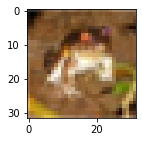

In [123]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])
# displaying the some image  from our dataset

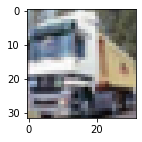

In [124]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

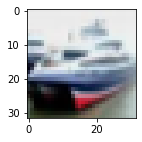

In [125]:
plt.figure(figsize = (15,2))
plt.imshow(X_test[1])

In [126]:
def Show_Image(x,index,y,classes):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    plt.show()

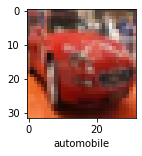

In [127]:
Show_Image(X_train,5,y_train,classes)

In [128]:
# Normalizing the images so that the computation cost decresases while processing the images with the help of our CNN model
X_train=X_train/255.

In [129]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [130]:
X_test=X_test/255.

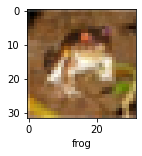

In [131]:
# Lets see how the image looks after normalization
Show_Image(X_train,0,y_train,classes) # There is no change in the image even after normalization

In [132]:
# Let's first create an initial cnn model with 3 convolution layers and 3 max pooling and then based on the accuracy we will decide
# wheather to fine tune the model or not

In [133]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # kernal_size is the size of the filter
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [134]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [135]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5621 - accuracy: 0.4315
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2074 - accuracy: 0.5712
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0691 - accuracy: 0.6239
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9676 - accuracy: 0.6609
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9024 - accuracy: 0.6854
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8470 - accuracy: 0.7046
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7985 - accuracy: 0.7195
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7560 - accuracy: 0.7348
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7222 - accuracy: 0.7481
Epoch 10/10
1563/1563 [==============================] - 29s 19m

In [136]:
# We are getting an accuracy of 76% on the train data using the cnn with the above configuration

In [137]:
cnn.evaluate(X_test,y_test)# 70% accuracy on the test set

313/313 [==============================] - 2s 6ms/step - loss: 0.8957 - accuracy: 0.7009


[0.8956641554832458, 0.7009000182151794]

In [138]:
y_pred=cnn.predict(X_test)

In [139]:
y_pred[0]

array([1.3693915e-03, 1.0038196e-03, 1.1895198e-03, 8.6168742e-01,
       1.5355407e-04, 7.5052239e-02, 5.1017027e-02, 6.7441899e-05,
       7.9858452e-03, 4.7351082e-04], dtype=float32)

In [140]:
# As we have used softmax activation function in the output layer it will give the probability of the test image to be in each
# classes and by doing argmax we can get the index of the class having the highest probability

In [141]:
y_pred[:5]

array([[1.36939145e-03, 1.00381963e-03, 1.18951977e-03, 8.61687422e-01,
        1.53554065e-04, 7.50522390e-02, 5.10170273e-02, 6.74418989e-05,
        7.98584521e-03, 4.73510823e-04],
       [8.38365685e-03, 6.85645565e-02, 9.24514734e-06, 6.56404245e-06,
        3.46671527e-06, 2.96536712e-07, 7.04806189e-06, 1.59235611e-07,
        9.19583082e-01, 3.44197033e-03],
       [2.12314874e-02, 7.60833085e-01, 1.74825697e-03, 2.85708578e-03,
        1.64095458e-04, 3.12439020e-04, 3.80803272e-03, 3.60243066e-05,
        1.45705849e-01, 6.33035526e-02],
       [6.46884203e-01, 3.60848010e-02, 9.74888855e-04, 9.27767775e-04,
        3.95998970e-04, 6.40778171e-06, 9.18552803e-04, 1.11793879e-05,
        3.12103271e-01, 1.69300858e-03],
       [2.11836177e-05, 1.16213392e-04, 1.49483960e-02, 1.43602695e-02,
        3.81132334e-01, 2.69764103e-03, 5.86541355e-01, 8.81579035e-05,
        4.44755569e-05, 4.99564085e-05]], dtype=float32)

In [142]:
pred_classes=[np.argmax(prob) for prob in y_pred]
pred_classes[:5]

[3, 8, 1, 0, 6]

In [143]:
# The 1st 5 images havae been classified successfully as the pred_class and y_test value are same

In [144]:
# lets check the preformance of the model wrt confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix

In [145]:
confusion_matrix(y_test,pred_classes)

array([[695,  24,  56,  13,  25,   3,   9,  10, 116,  49],
       [ 17, 808,   3,   5,   4,   1,   7,   1,  26, 128],
       [ 69,  10, 531,  68,  98,  68,  56,  49,  20,  31],
       [ 17,  10,  67, 543,  68, 138,  46,  50,  18,  43],
       [ 22,   9,  36,  71, 647,  44,  42, 103,  15,  11],
       [  8,   8,  46, 193,  55, 577,  22,  58,   5,  28],
       [  8,  10,  43,  81,  33,  21, 758,  12,   9,  25],
       [ 13,  10,  16,  40,  42,  51,   9, 754,   4,  61],
       [ 64,  25,   9,  12,   2,   5,   2,   4, 833,  44],
       [ 20,  48,  10,   7,   2,   3,   6,   6,  35, 863]], dtype=int64)

In [146]:
import pandas as pd
pd.DataFrame(confusion_matrix(y_test,pred_classes),columns=[f"pred_{i}" for i in classes],index=[f"actual_{i}" for i in classes])

,pred_airplane,pred_automobile,pred_bird,pred_cat,pred_deer,pred_dog,pred_frog,pred_horse,pred_ship,pred_truck
actual_airplane,695,24,56,13,25,3,9,10,116,49
actual_automobile,17,808,3,5,4,1,7,1,26,128
actual_bird,69,10,531,68,98,68,56,49,20,31
actual_cat,17,10,67,543,68,138,46,50,18,43
actual_deer,22,9,36,71,647,44,42,103,15,11
actual_dog,8,8,46,193,55,577,22,58,5,28
actual_frog,8,10,43,81,33,21,758,12,9,25
actual_horse,13,10,16,40,42,51,9,754,4,61
actual_ship,64,25,9,12,2,5,2,4,833,44
actual_truck,20,48,10,7,2,3,6,6,35,863


In [147]:
print(classification_report(y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72      1000
           1       0.84      0.81      0.82      1000
           2       0.65      0.53      0.58      1000
           3       0.53      0.54      0.53      1000
           4       0.66      0.65      0.65      1000
           5       0.63      0.58      0.60      1000
           6       0.79      0.76      0.77      1000
           7       0.72      0.75      0.74      1000
           8       0.77      0.83      0.80      1000
           9       0.67      0.86      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [148]:
# Checking some of the misclassified images
def Get_Wrong_Pred_Index(y_test,pred_classes,start,end):
    index_list=[]
    for i,actual_class in enumerate(y_test[start:end]):
        for j,predicted_class in enumerate(pred_classes[start:end]):
            if i==j and actual_class!=predicted_class:
                index_list.append(i+start)
    return index_list

In [149]:
# getting the indices of the no of misclassified images from the 1st 10 predictions
Get_Wrong_Pred_Index(y_test,pred_classes,0,10)

[2]

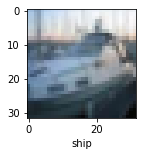

In [153]:
# So only the 6th image from the 1st 10 images is a misclassification lets check it
Show_Image(X_test,2,y_test,classes)

In [154]:
classes[pred_classes[2]] # the actual image was of automobile and our model has predicted it as airoplane

'automobile'

In [162]:
Get_Wrong_Pred_Index(y_test,pred_classes,10,20)

[10]

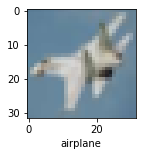

In [165]:
Show_Image(X_test,10,y_test,classes)

In [166]:
classes[pred_classes[10]]

'deer'

In [167]:
Get_Wrong_Pred_Index(y_test,pred_classes,20,30)

[22, 24, 25]

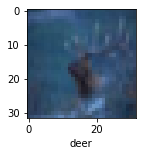

In [168]:
Show_Image(X_test,22,y_test,classes)

In [169]:
classes[pred_classes[22]]

'bird'

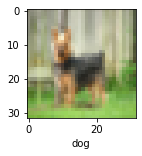

In [170]:
Show_Image(X_test,24,y_test,classes)

In [171]:
classes[pred_classes[24]]

'deer'

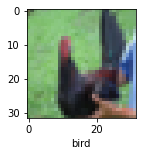

In [172]:
Show_Image(X_test,25,y_test,classes)

In [173]:
classes[pred_classes[25]]

'truck'

In [103]:
# As some of the misclassified images where really hazy and tough to classify even by humans.So I think the cnn model has
# done a decent job
# I tried to perform hyperparameter tuning on my local computer but the computational cost was getting very high so i stopped it
# still the accuracy can be increased upto some extent by tuning in google colab